<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Same_BSTs_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Same BSTs

An array of integers is said to represent the Binary Search Tree (BST) obtained by inserting each integer in the array, from left to right, into the BST.

Write a function that takes in two arrays of integers and determines whether these arrays represent the same BST. Note that you're not allowed to construct any BSTs in your code.

A BST is a Binary Tree that consists only of` BST` nodes. A node is said to be a valid `BST` node if and only if it satisfies the BST property: its value is strictly greater than the values of every node to its left; its value is less than or equal to the values of every node to its right; and its children nodes are either valid `BST` nodes themselves or `None` / `null`.

Sample Input

```
arrayOne = [10, 15, 8, 12, 94, 81, 5, 2, 11]
arrayTwo = [10, 8, 5, 15, 2, 12, 11, 94, 81]
```



Sample Output

```
true // both arrays represent the BST below
         10
       /     \
      8      15
    /       /   \
   5      12    94
 /       /     /
2       11    81

```



# Solution 1

In [1]:
# Time O(n^2)
# Space O(n*d)

def sameBsts(arrayOne, arrayTwo):
	if len(arrayOne) != len(arrayTwo):
		return False
	if len(arrayOne) == 0 and len(arrayTwo) == 0:
		return True
	if arrayOne[0] != arrayTwo[0]:
		return False

	leftOne = get_left_array(arrayOne)
	leftTwo = get_left_array(arrayTwo)
	rightOne = get_right_array(arrayOne)
	rightTwo = get_right_array(arrayTwo)

	return sameBsts(leftOne, leftTwo) and sameBsts(rightOne, rightTwo)

def get_left_array(array):
	left_array = []
	for i in range(1, len(array)):
		if array[i] < array[0]:
			left_array.append(array[i])
	return left_array

def get_right_array(array):
	right_array = []
	for i in range(1, len(array)):
		if array[i] >= array[0]:
			right_array.append(array[i])
	return right_array

In [2]:
arrayOne = [10, 15, 8, 12, 94, 81, 5, 2, 11]
arrayTwo = [10, 8, 5, 15, 2, 12, 11, 94, 81]
sameBsts(arrayOne, arrayTwo)

True

# Solution 2 : Not create new array

In [3]:
# Time O(n^2)
# Space O(d) : store only recursive call

def sameBsts(arrayOne, arrayTwo):
	return are_sameBsts(arrayOne, arrayTwo, 0, 0, float('-inf'), float('inf'))

def are_sameBsts(arrayOne, arrayTwo, rootIdxOne, rootIdxTwo, minValue, maxValue):
	if rootIdxOne == None or rootIdxTwo == None:
		return rootIdxOne == rootIdxTwo
	if arrayOne[rootIdxOne] != arrayTwo[rootIdxTwo]:
		return False

	left_rootIdxOne = get_idx_of_frist_smaller(arrayOne, rootIdxOne, minValue)
	left_rootIdxTwo = get_idx_of_frist_smaller(arrayTwo, rootIdxTwo, minValue)
	right_rootIdxOne = get_idx_of_frist_bigger_equal(arrayOne, rootIdxOne, maxValue)
	right_rootIdxTwo = get_idx_of_frist_bigger_equal(arrayTwo, rootIdxTwo, maxValue)
	
	current_value = arrayOne[rootIdxOne]
	left_are_same = are_sameBsts(arrayOne, arrayTwo, left_rootIdxOne, left_rootIdxTwo, minValue, current_value)
	right_are_same = are_sameBsts(arrayOne, arrayTwo, right_rootIdxOne, right_rootIdxTwo, current_value, maxValue)

	return left_are_same and right_are_same
	

def get_idx_of_frist_smaller(array, rootIdx, minValue):
	for i in range(rootIdx + 1, len(array)):
		if array[i] < array[rootIdx] and array[i] >= minValue:
			return i
	return None

def get_idx_of_frist_bigger_equal(array, rootIdx, maxValue):
	for i in range(rootIdx + 1, len(array)):
		if array[i] >= array[rootIdx] and array[i] < maxValue:
			return i
	return None

In [4]:
arrayOne = [10, 15, 8, 12, 94, 81, 5, 2, 11]
arrayTwo = [10, 8, 5, 15, 2, 12, 11, 94, 81]
sameBsts(arrayOne, arrayTwo)

True

# Conceptual Note

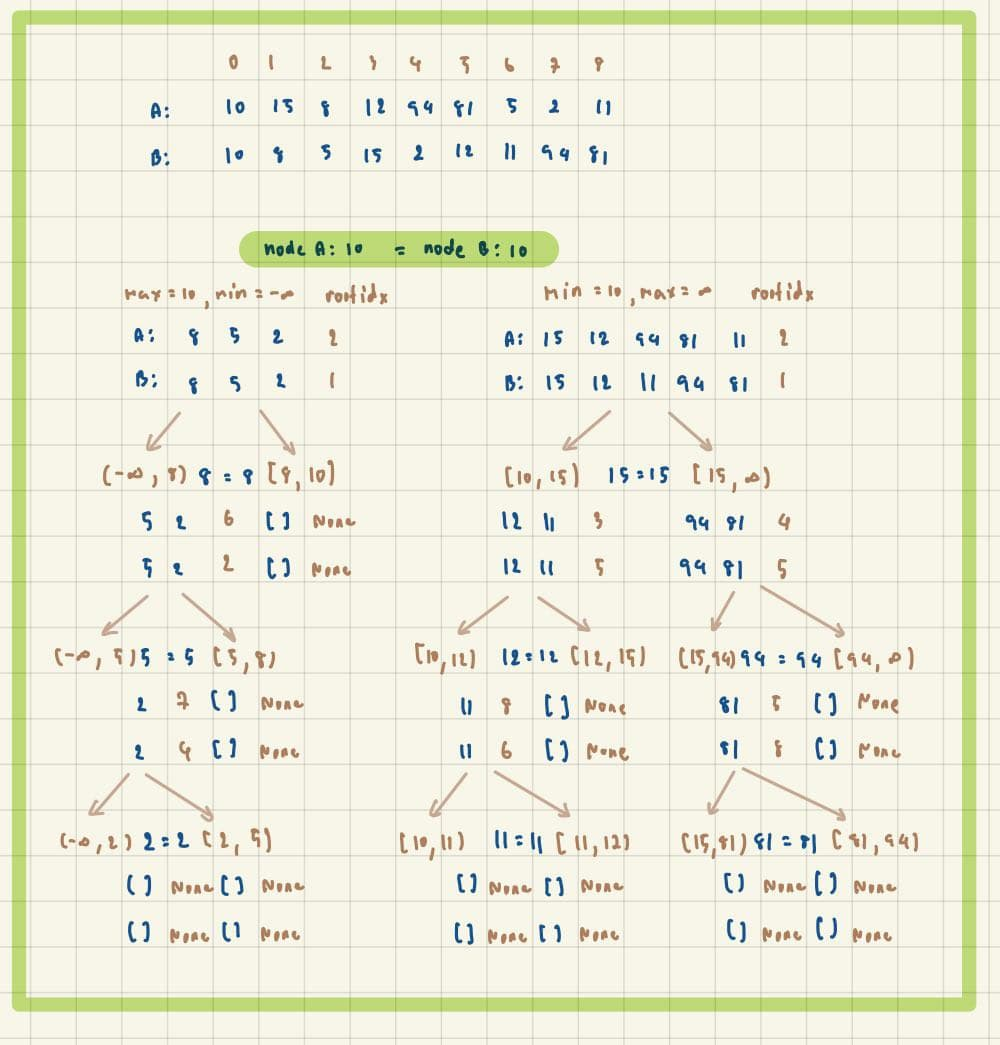